<a href="https://colab.research.google.com/github/tathi-martins/pos_eng_e_analise_de_dados/blob/main/C%C3%B3pia_3_de_Sala_2_Desafio_3_(Final)_ANALISE_DE_SENTIMENTOS_FIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alunos:

- Tathiana de Souza Martins - tsm2@cesar.school
- Eveline Cavalcanti - ecfp@cesar.school
- Bruno Santos - bfss@cesar.school
- Caio Guedes - ccsg@cesar.school
- JP -
- Kauã Marques -

# Atividade em Grupo


Vamos fazer uma análise de um dataset de sentimento, para isso, escolha um dataset qualquer, recomendo pegar um do Kaggle
https://www.kaggle.com/datasets?search=sentiment+analysis

Faça a análise dos dados e responda as perguntas:

1. Descreve como são os dados do dataset escolhido.
2. Que tipo de limpeza de dados vocês fizeram?
3. Quais são os termos mais frequêntes?
4. Qual o balanciamento dos dados antes da limpeza e após a limpeza?
5. Considere que vocês devem expandir essa base de dados
  - Quais as fontes de dados vocês podem usar?
  - Descreva como vocês iriam coletar esses dados?

# Bibliotecas

In [ ]:
!pip install wordninja
!pip install pyspellchecker
!pip install contractions
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541530 sha256=1043f54b37bc7189516047a342c8e81055a1c58200febde99b25de51d49f7b9f
  Stored in directory: /root/.cache/pip/wheels/aa/44/3a/f2a5c1859b8b541ded969b4cd12d0a58897f12408f4f51e084
Successfully built wordninja
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 27.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=fe46fb29f2cd1833df46ce15037e7e77071c59fdfb0c19c72becd3d9164fd846
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b

In [ ]:
import pandas as pd
import numpy as np
import math
import spacy
import re
import wordninja
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

from collections import Counter
from spellchecker import SpellChecker
from autocorrect import Speller
from contractions import fix


import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load('en_core_web_sm')  # ou 'pt_core_news_sm' para português

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# 1- Coleta dos dados da
* 1.1 Acesso/coleta dos dados
* 1.2 Análise dos dados
* 1.2.1 Nuvem de palavras
* 1.2.2 Frequencia de palavras


## 1.1 Acesso/coleta dos dados

In [ ]:
# Importar doc
raw_data = pd.read_csv('https://raw.githubusercontent.com/tathi-martins/Dataframes/refs/heads/main/Fin_Cleaned.csv')

raw_data.head()

,Date_published,Headline,Synopsis,Full_text,Final Status
0,2022-06-21,"Banks holding on to subsidy share, say payment...",The companies have written to the National Pay...,ReutersPayments companies and banks are at log...,Negative
1,2022-04-19,Digitally ready Bank of Baroda aims to click o...,"At present, 50% of the bank's retail loans are...",AgenciesThe bank presently has 20 million acti...,Positive
2,2022-05-27,Karnataka attracted investment commitment of R...,Karnataka is at the forefront in attracting in...,PTIKarnataka Chief Minister Basavaraj Bommai.K...,Positive
3,2022-04-06,Splitting of provident fund accounts may be de...,The EPFO is likely to split accounts only at t...,Getty ImagesThe budget for FY22 had imposed in...,Negative
4,2022-06-14,Irdai weighs proposal to privatise Insurance I...,"Set up in 2009 as an advisory body, IIB collec...",AgenciesThere is a view in the insurance indus...,Positive


## 1.2 Análise dos dados

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date_published  400 non-null    object
 1   Headline        400 non-null    object
 2   Synopsis        399 non-null    object
 3   Full_text       400 non-null    object
 4   Final Status    400 non-null    object
dtypes: object(5)
memory usage: 15.8+ KB


In [ ]:
raw_data.dropna(subset=['Synopsis'], inplace=True)

In [ ]:
raw_data.isnull().sum()

,0
Date_published,0
Headline,0
Synopsis,0
Full_text,0
Final Status,0


### 1.2.1 Nuvem de palavras

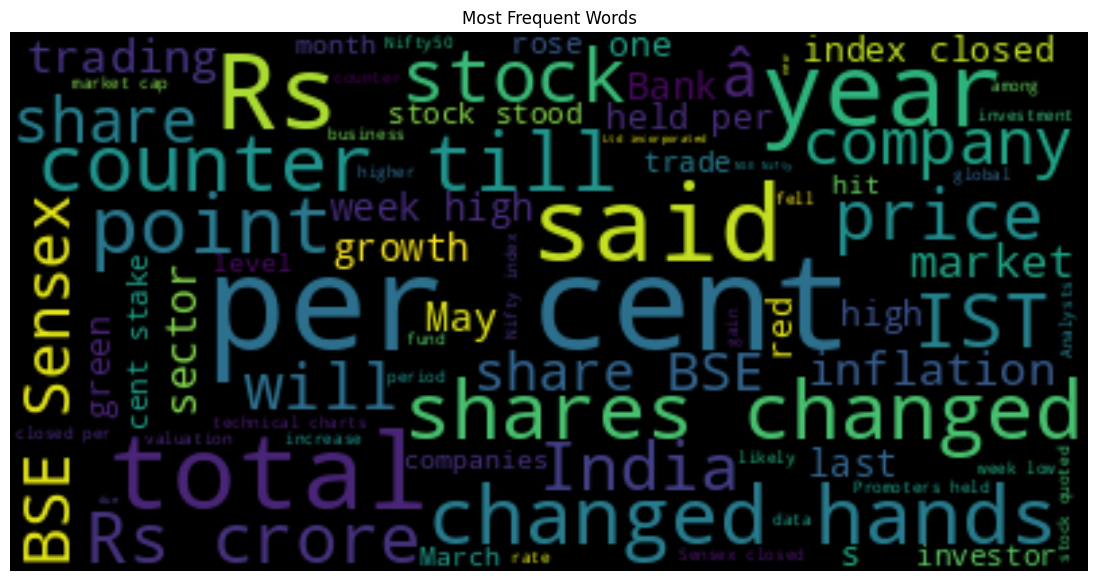

In [ ]:
posts = ' '.join(raw_data['Synopsis'].astype(str))
wordcloud = WordCloud(max_font_size = 50, max_words = 75, background_color = "black").generate(posts)

plt.figure(figsize = (15, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("Most Frequent Words")
plt.axis("off")
plt.show()

In [ ]:
df_raw_tokenized = raw_data['Synopsis']
tokens_list = [word_tokenize(item) for item in df_raw_tokenized]
tokens_list

[['The',
  'companies',
  'have',
  'written',
  'to',
  'the',
  'National',
  'Payments',
  'Corp.',
  'of',
  'India',
  '(',
  'NPCI',
  ')',
  ',',
  'complaining',
  'that',
  'â‚¹700',
  'crore',
  'of',
  'the',
  'â‚¹1,500',
  'crore',
  'granted',
  'in',
  'the',
  'budget',
  'is',
  'being',
  'retained',
  'by',
  'banks',
  '.'],
 ['At',
  'present',
  ',',
  '50',
  '%',
  'of',
  'the',
  'bank',
  "'s",
  'retail',
  'loans',
  'are',
  'sourced',
  'digitally',
  '.',
  'Out',
  'of',
  'this',
  ',',
  '97',
  '%',
  'of',
  'the',
  'bank',
  "'s",
  'personal',
  'loans',
  'are',
  'disbursed',
  'end-to-end',
  'digitally',
  'while',
  'the',
  'bulk',
  'of',
  'the',
  'home',
  'loan',
  'originations',
  'is',
  'done',
  'digitally',
  '.'],
 ['Karnataka',
  'is',
  'at',
  'the',
  'forefront',
  'in',
  'attracting',
  'investments',
  'and',
  'the',
  'WEF',
  'Meet',
  'has',
  'proved',
  'to',
  'be',
  'a',
  '``',
  'success',
  "''",
  ',',
  'he

In [ ]:
def tokenize_text(text):
  tokens = word_tokenize(text)
  return tokens

raw_data['Synopsis_tokens'] = raw_data['Synopsis'].apply(tokenize_text)

raw_data['Synopsis_tokens']

,Synopsis_tokens
0,"[The, companies, have, written, to, the, Natio..."
1,"[At, present, ,, 50, %, of, the, bank, 's, ret..."
2,"[Karnataka, is, at, the, forefront, in, attrac..."
3,"[The, EPFO, is, likely, to, split, accounts, o..."
4,"[Set, up, in, 2009, as, an, advisory, body, ,,..."
...,...
395,"[These, banks, raised, their, respective, exte..."
396,"[In, the, event, of, non-payment, ,, it, will,..."
397,"[A, total, of, 10,105, shares, changed, hands,..."
398,"[Calling, the, stock, 'attractively, valued, '..."


### 1.2.2 Frequencia de palavras

In [ ]:

def calculate_token_frequencies(tokens_list):

  all_tokens = [token for sublist in tokens_list for token in sublist]
  token_counts = Counter(all_tokens)
  total_tokens = len(all_tokens)

  token_frequencies = {token: count / total_tokens for token, count in token_counts.items()}

  return token_frequencies


token_frequencies = calculate_token_frequencies(tokens_list)

for token, frequency in token_frequencies.items():
  print(f"{token}: {frequency:.8f}")

The: 0.01241932
companies: 0.00098047
have: 0.00245118
written: 0.00008171
to: 0.01560585
the: 0.04902361
National: 0.00049024
Payments: 0.00008171
Corp.: 0.00008171
of: 0.02786175
India: 0.00302312
(: 0.00898766
NPCI: 0.00008171
): 0.00915107
,: 0.04510172
complaining: 0.00008171
that: 0.00514748
â‚¹700: 0.00008171
crore: 0.00334995
â‚¹1,500: 0.00008171
granted: 0.00008171
in: 0.02058992
budget: 0.00008171
is: 0.00678160
being: 0.00040853
retained: 0.00008171
by: 0.00514748
banks: 0.00073535
.: 0.03684942
At: 0.00024512
present: 0.00016341
50: 0.00065365
%: 0.00580113
bank: 0.00081706
's: 0.00310483
retail: 0.00008171
loans: 0.00024512
are: 0.00285971
sourced: 0.00008171
digitally: 0.00024512
Out: 0.00008171
this: 0.00155241
97: 0.00008171
personal: 0.00008171
disbursed: 0.00008171
end-to-end: 0.00008171
while: 0.00416701
bulk: 0.00008171
home: 0.00008171
loan: 0.00016341
originations: 0.00008171
done: 0.00016341
Karnataka: 0.00008171
at: 0.01299126
forefront: 0.00008171
attracting: 0

# 2- Limpeza e análise de balanceamento dos dados
* 2.1 Análise de balanceamento antes da limpeza
* 2.2 Limpeza dos dados
* 2.3 Análise de balanceamento após a limpeza




## 2.1 Análise de balanceamento antes da limpeza

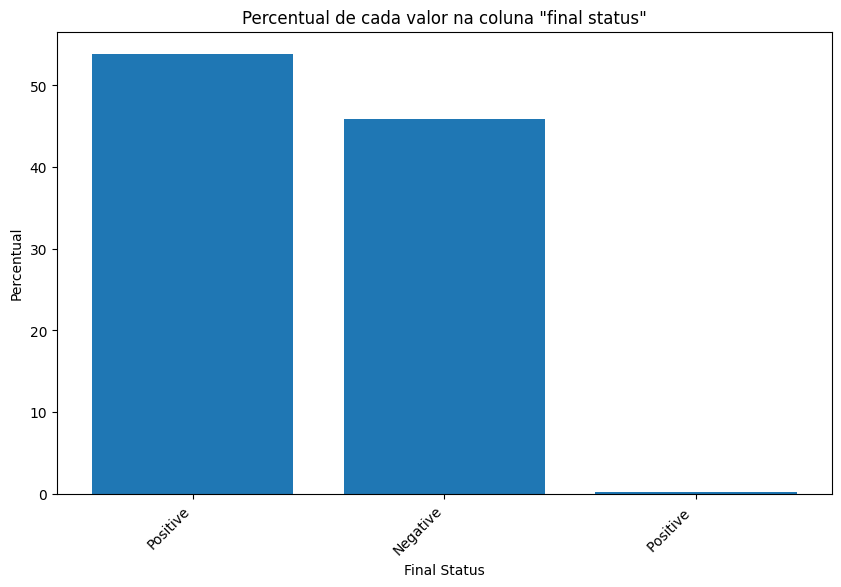

In [ ]:
status_percent = raw_data['Final Status'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
plt.bar(status_percent.index, status_percent.values)
plt.xlabel('Final Status')
plt.ylabel('Percentual')
plt.title('Percentual de cada valor na coluna "final status"')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
raw_data['Final Status'] = raw_data['Final Status'].replace('Positive ', 'Positive')

## 2.2 Análise de balanceamento após a limpeza

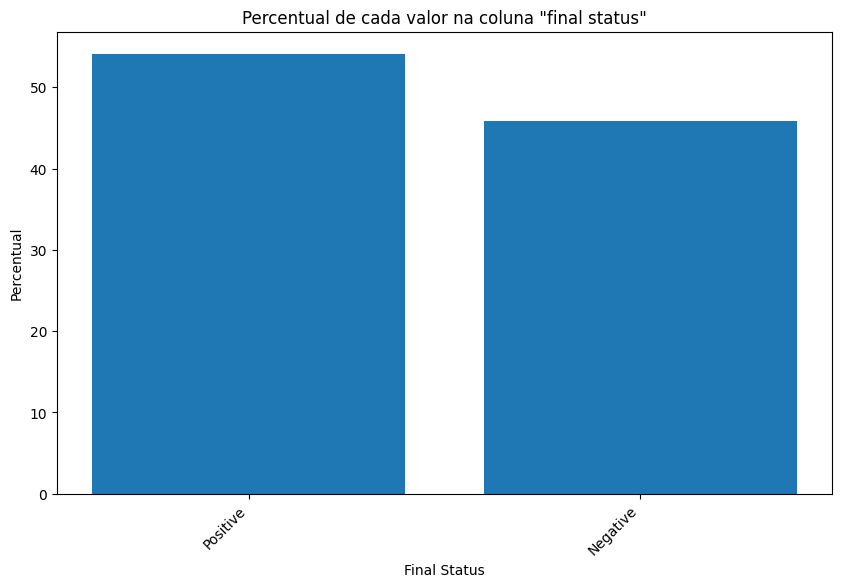

In [ ]:
status_percent = raw_data['Final Status'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
plt.bar(status_percent.index, status_percent.values)
plt.xlabel('Final Status')
plt.ylabel('Percentual')
plt.title('Percentual de cada valor na coluna "final status"')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
full_text = raw_data['Full_text']
for idx, doc in enumerate(full_text[:5]):
  print(f'Documento {idx+1}: {doc}')

Documento 1: ReutersPayments companies and banks are at loggerheads over the sharing of government-granted subsidies for building payment infrastructure, said three people with knowledge of the matter. 

The companies have written to the National Payments Corp. of India (NPCI), complaining that â‚¹700 crore of the â‚¹1,500 crore granted in the budget is being retained by banks, they said. This has deprived companies connecting up the last mile of state-promised revenues, according to them. The government granted the subsidies in exchange for waiving Merchant Discount Rate (MDR) charges.

"The government has released â‚¹700 crore worth of subsidies to banks but they are not sharing it with any payment aggregators," said the CEO of a payments company on condition of anonymity.


Compensation for MDR Waiver 
 "We have taken up the matter with NPCI, which is the nodal agency but the feedback that we got is that we should take the matter up with respective banks, but they are not responding

## 2.3 Limpeza dos dados

In [72]:
# Instanciar/inicializar o corretor ortográfico e o lematizador
lemmatizer = WordNetLemmatizer()
spell = SpellChecker()

In [ ]:
"""# Função para remover acentuação e normalizar unicode
def remover_acentuacao(texto):
    if not isinstance(texto, str):
        texto = str(texto)
    return unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')

# Função para converter tags de POS do nltk para as do WordNet
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Definindo as expressões regulares para limpar os dados
punctuation_regex = r'[.,!?()"<>]'

# Função de limpeza do texto com wordninja e autocorrect
def limpar_documento(doc):
    # Normaliza o unicode (remove acentuação)
    doc = remover_acentuacao(doc)

    # Remove pontuações
    doc = re.sub(punctuation_regex, '', doc)

    # Mantém apenas caracteres alfabéticos e espaços
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)

    # Tratar diferentes tipos de quebras de linha e espaços extras
    doc = re.sub(r"[\r\n]+", " ", doc)
    doc = re.sub(r"\t+", " ", doc)
    doc = re.sub(r"\s+", " ", doc)

    # Expansão de contrações
    doc = fix(doc)

    # Separação de palavras grudadas com wordninja
    tokens = wordninja.split(doc)

    # Correção ortográfica com `Speller` diretamente
    tokens = [spell(word) for word in tokens]

    # Conversão para minúsculas e aplicação de stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and len(word) > 2]

    # Aplicar lemmatization nas palavras filtradas
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in filtered_tokens]

    # Retorna o texto limpo e lematizado
    return ' '.join(lemmatized_words)
"""

In [73]:
# Função para remover acentuação e normalizar unicode
def remover_acentuacao(texto):
    if not isinstance(texto, str):
        texto = str(texto)
    return unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')

# Função para converter tags de POS do nltk para as do WordNet
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Expressão regular para remover pontuação
punctuation_regex = r'[.,!?()"<>]'

# Função de limpeza do texto com Spacy para remoção de entidades nomeadas
def limpar_documento(doc):
    # Normalizar o unicode (remover acentuação)
    doc = remover_acentuacao(doc)

    # Expansão de contrações
    doc = fix(doc)

    # Separação de palavras grudadas com wordninja
    tokens = wordninja.split(doc)

    # Processar o texto com Spacy para identificar e remover entidades nomeadas
    spacy_doc = nlp(' '.join(tokens))
    doc = ' '.join([token.text for token in spacy_doc if not token.ent_type_ in ['PERSON', 'GPE']])

    # Remover pontuações
    doc = re.sub(punctuation_regex, '', doc)

    # Manter apenas caracteres alfabéticos e espaços
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)

    # Tratar diferentes tipos de quebras de linha e espaços extras
    doc = re.sub(r"[\r\n]+", " ", doc)
    doc = re.sub(r"\t+", " ", doc)
    doc = re.sub(r"\s+", " ", doc)

    # Correção ortográfica com spell.correction
    tokens = [spell.correction(word) if spell.correction(word) else word for word in doc.split()]

    # Remover stopwords, ignorando None e verificando tokens válidos
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word and word.lower() not in stop_words and len(word) > 2]

    # Aplicar lematização
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in filtered_tokens]

    # Retornar o texto limpo e lematizado
    return ' '.join(lemmatized_words)

# Exemplo de uso em uma lista de documentos
txt_limpo = [limpar_documento(doc) for doc in full_text]

# Exibir o resultado dos documentos limpos
for idx, doc in enumerate(txt_limpo[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)


========== Doc 0 ==========
renter payment company bank loggerhead share government grant subsidy building payment infrastructure say three people knowledge matter company write national payment cop india complain crore crore grant budget retain bank say deprive company connect last mile state promise revenue accord government grant subsidy exchange waive merchant discount rate mar charge government release crore worth subsidy bank share payment aggregate say coo payment company condition anonymity compensation mar waiver take matter nodal agency feedback get take matter respective bank respond last year finance minister harm announce crore fund hasten expansion digital payment industry move see compensate waiver mar use unified payment interface run pay card previous budget payment aggregate entitle receive basis point sub vent ion small value digital transaction basis point percentage point ask bank process transaction run pay debit card share subsidy amount say another coo payment a

In [ ]:
# Função para remover acentuação e normalizar unicode
def remover_acentuacao(texto):
    if not isinstance(texto, str):
        texto = str(texto)
    return unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')

# Função para converter tags de POS do nltk para as do WordNet
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Definindo as expressões regulares para limpar os dados
punctuation_regex = r'[.,!?()"<>]'

# Função de limpeza do texto
def limpar_documento(doc):
    # Normalizar o unicode (remover acentuação)
    doc = remover_acentuacao(doc)

    # Expansão de contrações
    doc = fix(doc)

    # Separação de palavras grudadas com wordninja
    tokens = wordninja.split(doc)
    doc = ' '.join(tokens)

    # Processar o texto com Spacy para identificar entidades
    spacy_doc = nlp(doc)

    # Remover as entidades nomeadas do texto
    doc = ' '.join([token.text for token in spacy_doc if not token.ent_type_ in ['PERSON', 'ORG', 'GPE']])

    # Remover pontuações
    doc = re.sub(punctuation_regex, '', doc)

    # Manter apenas caracteres alfabéticos e espaços
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)

    # Tratar diferentes tipos de quebras de linha e espaços extras
    doc = re.sub(r"[\r\n]+", " ", doc)
    doc = re.sub(r"\t+", " ", doc)
    doc = re.sub(r"\s+", " ", doc)

    # Correção ortográfica com spell.correction, ignorando palavras que não podem ser corrigidas
    tokens = [spell.correction(word) for word in doc.split() if spell.correction(word) is not None]

    # Remover stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and len(word) > 2]

    # Aplicar lematização
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in filtered_tokens]

    # Retornar o texto limpo e lematizado
    return ' '.join(lemmatized_words)

In [ ]:
# Aplicar a limpeza a cada documento
txt_limpo = [limpar_documento(doc) for doc in full_text]

# Exibir o resultado dos documentos limpos
for idx, doc in enumerate(txt_limpo[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)

========== Doc 0 ==========
payment company bank loggerhead share government grant subsidy building payment infrastructure say three people knowledge matter company write complain crore crore grant budget retain bank say deprive company connect last mile state promise revenue accord government grant subsidy exchange waive merchant discount rate mar charge government release crore worth subsidy bank share payment aggregate say coo payment company condition anonymity take matter nodal agency feedback get take matter respective bank respond last year finance minister harm announce crore fund hasten expansion digital payment industry move see compensate waiver use run pay card previous budget payment aggregate entitle receive basis point sub vent ion small value digital transaction basis point percentage point ask bank process transaction run pay debit card share subsidy amount say another coo payment aggregate put much effort acquire transaction run pay platform bank either surrender card

Removemos acentos, pontuações, palavras grudadas, qebras de linhas e espaços extras e stopwords. Tratamos os dados restantes com o método de lemmatização e correção ortográfica.

# 3- Stemming e Lemmatization

> Adicionar blockquote


* 3.1 Analise se o Stemming e o Lemmatization podem te ajudar aqui

Foi realizada na etapa de limpeza acima.

# 4- Tópicos
* 4.1 Faça o TF-IDF dos documentos
* 4.2 Com base no notebook da Aula 04, faça a geração de tópicos

## 4.1 Faça o TF-IDF dos documentos

In [74]:
# Inicializando o vetor TF-IDF com filtros de frequência mínima e máxima
vectorizer = TfidfVectorizer(min_df=2, max_df=0.90)

# Calculando a matriz TF-IDF com os documentos limpos e stemmados
tfidf_matrix = vectorizer.fit_transform(txt_limpo)

# Convertendo a matriz para um DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Exibindo o DataFrame com TF-IDF
print(tfidf_df)

# Identificando os 5 termos com o maior TF-IDF
top_terms = tfidf_df.max().sort_values(ascending=False).head(5)
print("\nTop 5 termos com maior TF-IDF:")
print(top_terms)


      ab  ability      able  ably  abri  abrupt   absence  absolute  \
0    0.0      0.0  0.000000   0.0   0.0     0.0  0.000000       0.0   
1    0.0      0.0  0.000000   0.0   0.0     0.0  0.000000       0.0   
2    0.0      0.0  0.000000   0.0   0.0     0.0  0.000000       0.0   
3    0.0      0.0  0.032401   0.0   0.0     0.0  0.000000       0.0   
4    0.0      0.0  0.088993   0.0   0.0     0.0  0.193171       0.0   
..   ...      ...       ...   ...   ...     ...       ...       ...   
394  0.0      0.0  0.000000   0.0   0.0     0.0  0.000000       0.0   
395  0.0      0.0  0.000000   0.0   0.0     0.0  0.000000       0.0   
396  0.0      0.0  0.000000   0.0   0.0     0.0  0.000000       0.0   
397  0.0      0.0  0.000000   0.0   0.0     0.0  0.000000       0.0   
398  0.0      0.0  0.000000   0.0   0.0     0.0  0.000000       0.0   

     absolutely  absorb  ...  yearly  yen  yes       yet  yield  zee  zenith  \
0           0.0     0.0  ...     0.0  0.0  0.0  0.000000    0.0  0.

## 4.1.2 TF-IDF com função própria

In [ ]:
# Aplicar a tokenização a cada documento
tokens = [word_tokenize(doc) for doc in txt_limpo]
#print(tokens)

# Exibir o resultado dos documentos tokenizados
for idx, doc in enumerate(tokens[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)


========== Doc 0 ==========
['payment', 'company', 'bank', 'loggerhead', 'share', 'government', 'grant', 'subsidy', 'building', 'payment', 'infrastructure', 'say', 'three', 'people', 'knowledge', 'matter', 'company', 'write', 'complain', 'crore', 'crore', 'grant', 'budget', 'retain', 'bank', 'say', 'deprive', 'company', 'connect', 'last', 'mile', 'state', 'promise', 'revenue', 'accord', 'government', 'grant', 'subsidy', 'exchange', 'waive', 'merchant', 'discount', 'rate', 'mar', 'charge', 'government', 'release', 'crore', 'worth', 'subsidy', 'bank', 'share', 'payment', 'aggregate', 'say', 'coo', 'payment', 'company', 'condition', 'anonymity', 'take', 'matter', 'nodal', 'agency', 'feedback', 'get', 'take', 'matter', 'respective', 'bank', 'respond', 'last', 'year', 'finance', 'minister', 'harm', 'announce', 'crore', 'fund', 'hasten', 'expansion', 'digital', 'payment', 'industry', 'move', 'see', 'compensate', 'waiver', 'use', 'run', 'pay', 'card', 'previous', 'budget', 'payment', 'aggrega

In [75]:
# Contar as ocorrências de cada palavra em cada lista
word_counts = [Counter(doc) for doc in tokens]

# Exibir o resultado
for idx, count in enumerate(word_counts[:5]):
    print(f"========== Doc {idx} ==========")
    print(count)


========== Doc 0 ==========
Counter({'payment': 14, 'bank': 6, 'say': 6, 'digital': 5, 'company': 4, 'share': 4, 'subsidy': 4, 'matter': 4, 'crore': 4, 'card': 4, 'government': 3, 'grant': 3, 'charge': 3, 'aggregate': 3, 'run': 3, 'pay': 3, 'point': 3, 'value': 3, 'transaction': 3, 'term': 3, 'budget': 2, 'last': 2, 'accord': 2, 'merchant': 2, 'release': 2, 'coo': 2, 'take': 2, 'respond': 2, 'year': 2, 'expansion': 2, 'basis': 2, 'cost': 2, 'fee': 2, 'review': 2, 'total': 2, 'volume': 2, 'decline': 2, 'loggerhead': 1, 'building': 1, 'infrastructure': 1, 'three': 1, 'people': 1, 'knowledge': 1, 'write': 1, 'complain': 1, 'retain': 1, 'deprive': 1, 'connect': 1, 'mile': 1, 'state': 1, 'promise': 1, 'revenue': 1, 'exchange': 1, 'waive': 1, 'discount': 1, 'rate': 1, 'mar': 1, 'worth': 1, 'condition': 1, 'anonymity': 1, 'nodal': 1, 'agency': 1, 'feedback': 1, 'get': 1, 'respective': 1, 'finance': 1, 'minister': 1, 'harm': 1, 'announce': 1, 'fund': 1, 'hasten': 1, 'industry': 1, 'move': 1, '

In [76]:
# Calculando o TF
def computeTF(word_dict):
    tfDict = {}
    doc_lenght = len(word_dict)
    for word, count in word_dict.items():
        tfDict[word] = count / float(doc_lenght)
    return tfDict

# Função para calcular o IDF
def computeIDF(documents):
    N = len(documents)  # Número total de documentos
    idfDict = {}

    # Contar o número de documentos em que cada palavra aparece
    word_document_counts = Counter()
    for doc in documents:
        for word in doc:
            word_document_counts[word] += 1

    # Calcular o IDF para cada palavra
    for word, count in word_document_counts.items():
        idfDict[word] = math.log(N / float(count))

    return idfDict

# Função para calcular o TF-IDF
def computeTFIDF(tf_documents, idfDict):
    tfidf_documents = []
    for tf_doc in tf_documents:
        tfidf_dict = {word: tf * idfDict.get(word, 0) for word, tf in tf_doc.items()}
        tfidf_documents.append(tfidf_dict)
    return tfidf_documents

In [77]:
# Aplicar a função que conta o TF de cada documento
tf_documents = [computeTF(doc) for doc in word_counts]

for idx, doc in enumerate(tf_documents[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)

========== Doc 0 ==========
{'payment': 0.08974358974358974, 'company': 0.02564102564102564, 'bank': 0.038461538461538464, 'loggerhead': 0.00641025641025641, 'share': 0.02564102564102564, 'government': 0.019230769230769232, 'grant': 0.019230769230769232, 'subsidy': 0.02564102564102564, 'building': 0.00641025641025641, 'infrastructure': 0.00641025641025641, 'say': 0.038461538461538464, 'three': 0.00641025641025641, 'people': 0.00641025641025641, 'knowledge': 0.00641025641025641, 'matter': 0.02564102564102564, 'write': 0.00641025641025641, 'complain': 0.00641025641025641, 'crore': 0.02564102564102564, 'budget': 0.01282051282051282, 'retain': 0.00641025641025641, 'deprive': 0.00641025641025641, 'connect': 0.00641025641025641, 'last': 0.01282051282051282, 'mile': 0.00641025641025641, 'state': 0.00641025641025641, 'promise': 0.00641025641025641, 'revenue': 0.00641025641025641, 'accord': 0.01282051282051282, 'exchange': 0.00641025641025641, 'waive': 0.00641025641025641, 'merchant': 0.0128205

In [78]:
# Calcular o IDF
idf_dict = computeIDF(word_counts)

print(idf_dict)

{'payment': 3.4240120594283265, 'company': 0.5596157879354227, 'bank': 1.270462545594769, 'loggerhead': 5.988961416889864, 'share': 0.37219031922329215, 'government': 2.1177604059819726, 'grant': 4.04305126783455, 'subsidy': 4.04305126783455, 'building': 3.791736839553644, 'infrastructure': 3.044522437723423, 'say': 0.5907987153721107, 'three': 1.8780875527165524, 'people': 2.9932291433358724, 'knowledge': 3.9095198752100275, 'matter': 3.155748072833647, 'write': 2.4054424784337534, 'complain': 5.988961416889864, 'crore': 0.774025659280878, 'budget': 4.04305126783455, 'retain': 4.379523504455763, 'deprive': 5.988961416889864, 'connect': 4.197201947661808, 'last': 1.2014696741078175, 'mile': 5.295814236329918, 'state': 2.810907586541918, 'promise': 4.379523504455763, 'revenue': 2.1177604059819726, 'accord': 1.5701208090932657, 'exchange': 2.0571357841655376, 'waive': 5.988961416889864, 'merchant': 4.379523504455763, 'discount': 3.686376323895818, 'rate': 1.7842687974988973, 'mar': 1.393

In [79]:
# Calcular o TF-IDF para cada documento
tfidf_documents = computeTFIDF(tf_documents, idf_dict)

# Exibir o resultado
for idx, doc in enumerate(tfidf_documents[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)

========== Doc 0 ==========
{'payment': 0.30728313353843956, 'company': 0.01434912276757494, 'bank': 0.04886394406133727, 'loggerhead': 0.03839077831339656, 'share': 0.009543341518545953, 'government': 0.040726161653499474, 'grant': 0.0777509859198952, 'subsidy': 0.10366798122652693, 'building': 0.024306005381754127, 'infrastructure': 0.019516169472586043, 'say': 0.02272302751431195, 'three': 0.012039022773824053, 'people': 0.01918736630343508, 'knowledge': 0.025061024841089918, 'matter': 0.0809166172521448, 'write': 0.015419503066883033, 'complain': 0.03839077831339656, 'crore': 0.019846811776432768, 'budget': 0.051833990613263464, 'retain': 0.028073868618306172, 'deprive': 0.03839077831339656, 'connect': 0.026905140690139797, 'last': 0.015403457360356634, 'mile': 0.03394752715596101, 'state': 0.018018638375268705, 'promise': 0.028073868618306172, 'revenue': 0.013575387217833157, 'accord': 0.020129753962734174, 'exchange': 0.013186767847214984, 'waive': 0.03839077831339656, 'merchant'

In [80]:
# Converta a lista de dicionários em dataframe
df = pd.DataFrame(tfidf_documents)

# Encontra os valores mais altos de TF_IDF  para cada termo de cada documento
max_tfidf = df.max()

# Ordena os termos em ordem decrescente
top_terms = max_tfidf.sort_values(ascending=False).head(5)

# Print the top 5 terms
print("\nTop 5 termos com maior TF-IDF:")
print(top_terms)


Top 5 termos com maior TF-IDF:
fertilizer    0.736531
number        0.654642
wheat         0.588424
reserve       0.582269
sugar         0.546923
dtype: float64


Os cinco termos mais frequentes nos documentos são diferentes dependendo do método de calculo do TF-IDF. Porque será?

1. **Normalização e Escalonamento dos Valores**

O TfidfVectorizer do Scikit-learn aplica uma normalização adicional aos vetores TF-IDF, geralmente utilizando a norma L2. Essa normalização ajusta os valores TF-IDF de forma que o comprimento do vetor para cada documento seja 1, distribuindo proporcionalmente os pesos para cada palavra dentro do documento.
Na função própria, não houve normalização. Isso significa que os valores TF-IDF resultantes podem ter magnitudes diferentes e, consequentemente, alterar os valores relativos de cada termo.

2. **Definição do TF (Term Frequency)**

O Scikit-learn usa por padrão uma definição de TF com ajuste de sublinearidade (usando
1 + log
⁡
(
tf
)
1+log(tf) em vez de apenas TF). Essa abordagem reduz a diferença entre termos de alta frequência e baixa frequência dentro do mesmo documento. Esta abordagem não foi aplicada no função própria, foi utilizado apenas o cálculo clássico de TF com uma proporção simples entre a contagem de ocorrências de uma palavra e o total de palavras do documento, podendo resultar em valores diferentes de TF-IDF para termos comuns e raros.

3. **Método de Cálculo do IDF (Inverse Document Frequency)**

Scikit-learn usa por padrão uma variação no cálculo do IDF, adicionando uma unidade ao denominador, ou seja,
IDF
=
log
⁡
(
𝑁
+
1
df
+
1
)
+
1
IDF=log(
df+1
N+1
​
 )+1, para evitar divisões por zero e aumentar a estabilidade numérica.
Na função própria, o IDF foi definido como
IDF
=
log
⁡
(
𝑁
df
)
IDF=log(
df
N
​
 ), sem esse ajuste. Isso pode causar variações nos valores de IDF, especialmente para palavras que aparecem em muitos documentos.

4. **Precisão Numérica e Arredondamento**

O Scikit-learn utiliza cálculos otimizados e métodos que podem ter um nível mais alto de precisão e arredondamento, enquanto que a função própria pode apresentar pequenas diferenças devido ao tipo de dados e arredondamentos feitos implicitamente.

In [81]:
# Função otimizada para calcular o TF com ajuste logarítmico
def computeTF(word_dict):
    tfDict = {}
    for word, count in word_dict.items():
        # Suavização logarítmica
        tfDict[word] = 1 + math.log(count) if count > 0 else 0
    return tfDict

# Função aprimorada para calcular o IDF com suavização
def computeIDF(documents):
    N = len(documents)  # Número total de documentos
    idfDict = {}

    # Contar em quantos documentos cada palavra aparece
    word_document_counts = Counter()
    for doc in documents:
        for word in set(doc):  # Usar 'set(doc)' para evitar duplicações
            word_document_counts[word] += 1

    # Calcular o IDF suavizado
    for word, count in word_document_counts.items():
        idfDict[word] = math.log((N + 1) / (count + 1)) + 1

    return idfDict

# Função aprimorada para calcular o TF-IDF com normalização L2
def computeTFIDF(tf_documents, idfDict):
    tfidf_documents = []

    for tf_doc in tf_documents:
        # Calcular o TF-IDF multiplicando o TF e o IDF de cada palavra
        tfidf_dict = {word: tf * idfDict.get(word, 0) for word, tf in tf_doc.items()}

        # Calcular a norma L2
        norm = math.sqrt(sum([value**2 for value in tfidf_dict.values()]))

        # Normalizar os valores TF-IDF com a norma L2
        tfidf_dict = {word: (value / norm) for word, value in tfidf_dict.items()} if norm > 0 else tfidf_dict
        tfidf_documents.append(tfidf_dict)

    return tfidf_documents


In [82]:
# Aplicar a função que conta o TF de cada documento
tf_documents2 = [computeTF(doc) for doc in word_counts]

for idx, doc in enumerate(tf_documents2[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)

========== Doc 0 ==========
{'payment': 3.6390573296152584, 'company': 2.386294361119891, 'bank': 2.791759469228055, 'loggerhead': 1.0, 'share': 2.386294361119891, 'government': 2.09861228866811, 'grant': 2.09861228866811, 'subsidy': 2.386294361119891, 'building': 1.0, 'infrastructure': 1.0, 'say': 2.791759469228055, 'three': 1.0, 'people': 1.0, 'knowledge': 1.0, 'matter': 2.386294361119891, 'write': 1.0, 'complain': 1.0, 'crore': 2.386294361119891, 'budget': 1.6931471805599454, 'retain': 1.0, 'deprive': 1.0, 'connect': 1.0, 'last': 1.6931471805599454, 'mile': 1.0, 'state': 1.0, 'promise': 1.0, 'revenue': 1.0, 'accord': 1.6931471805599454, 'exchange': 1.0, 'waive': 1.0, 'merchant': 1.6931471805599454, 'discount': 1.0, 'rate': 1.0, 'mar': 1.0, 'charge': 2.09861228866811, 'release': 1.6931471805599454, 'worth': 1.0, 'aggregate': 2.09861228866811, 'coo': 1.6931471805599454, 'condition': 1.0, 'anonymity': 1.0, 'take': 1.6931471805599454, 'nodal': 1.0, 'agency': 1.0, 'feedback': 1.0, 'get':

In [83]:
# Calcular o IDF
idf_dict2 = computeIDF(word_counts)

print(idf_dict2)

{'respectively': 2.458865053954726, 'could': 2.1874435023747254, 'system': 3.946942109384559, 'coo': 4.101092789211817, 'related': 3.0996442489973552, 'slow': 3.946942109384559, 'get': 2.502828177375842, 'volume': 2.880590682934671, 'significantly': 4.506557897319982, 'loggerhead': 6.298317366548036, 'credit': 3.855970331178832, 'recently': 4.101092789211817, 'rate': 2.7719568419318756, 'one': 2.1874435023747254, 'currently': 3.946942109384559, 'amount': 4.1582512030517655, 'pay': 2.966112856372833, 'acquire': 4.794239969771763, 'believe': 3.0794415416798357, 'percentage': 4.101092789211817, 'share': 1.371063681390832, 'hasten': 5.892852258439873, 'viability': 6.298317366548036, 'decline': 2.6220166946409607, 'query': 5.605170185988092, 'subsidy': 4.912023005428146, 'budget': 4.912023005428146, 'condition': 3.695627681103653, 'connect': 5.045554398052669, 'vent': 5.199705077879927, 'sub': 4.426515189646445, 'cost': 2.948413279273432, 'ultimately': 5.892852258439873, 'process': 4.158251

In [84]:
# Calcular o TF-IDF para cada documento
tfidf_documents2 = computeTFIDF(tf_documents2, idf_dict2)

# Exibir o resultado
for idx, doc in enumerate(tfidf_documents2[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)

========== Doc 0 ==========
{'payment': 0.23840777057545018, 'company': 0.0559527818160307, 'bank': 0.09514174791395086, 'loggerhead': 0.09480397078526615, 'share': 0.04924743651523592, 'government': 0.09791428363487313, 'grant': 0.15516529483346003, 'subsidy': 0.17643567137290708, 'building': 0.07057827748478256, 'infrastructure': 0.06014483927718863, 'say': 0.06676451644414454, 'three': 0.04311466971255486, 'people': 0.05941043657415967, 'knowledge': 0.07216419236760462, 'matter': 0.14730775055971176, 'write': 0.05088489920722821, 'complain': 0.09480397078526615, 'crore': 0.0636167127271988, 'budget': 0.12518638287149267, 'retain': 0.07826736247263842, 'deprive': 0.09480397078526615, 'connect': 0.0759470448867874, 'last': 0.05595830595875035, 'mile': 0.08870080068023235, 'state': 0.056786022391892906, 'promise': 0.07826736247263842, 'revenue': 0.046656680780714714, 'accord': 0.06525992021190576, 'exchange': 0.045762223437520844, 'waive': 0.09480397078526615, 'merchant': 0.13251816410

In [85]:
# Converta a lista de dicionários em dataframe
df2 = pd.DataFrame(tfidf_documents2)

# Encontra os valores mais altos de TF_IDF  para cada termo de cada documento
max_tfidf2 = df2.max()

# Ordena os termos em ordem decrescente
top_terms2 = max_tfidf2.sort_values(ascending=False).head(5)

# Print the top 5 terms
print("\nTop 5 termos com maior TF-IDF:")
print(top_terms2)


Top 5 termos com maior TF-IDF:
number        0.470902
sugar         0.442183
olive         0.429545
reserve       0.412663
fertilizer    0.399405
dtype: float64


Mesmo com as mudanças feitas para alinhar o cálculo manual ao Scikit-learn, ainda há algumas diferenças nos resultados.

Isso pode acontecer se termos mais frequentes como, por exemplo, "page" aparecerem em muitos documentos, o IDF será menor para esses termos no Scikit-learn, enquanto que na função própria, esses valores não estão sendo ajustados.

Palavras com frequência baixa, termos únicos e muito raros, podem acabar tendo TF-IDF mais alto na função manual devido à diferença de normalização.

# 5- Classificação
* 5.1 Implemente um modelo de classificação a escolha do grupo. (Dica: use algum que vocês viram em ML, a ideia não é ter o melhor modelo, mas entender o fluxo completo)


In [86]:
# Mapeia 'Final Status' para 1 e 0
label_mapping = {'Positive': 1, 'Negative': 0}
raw_data['labels'] = raw_data['Final Status'].map(label_mapping)

In [87]:
# Vamos pegar os rótulos para os documentos que temos em (TF-IDF calculado pelo Scikit-Learn)
labels = raw_data['labels'].iloc[:len(tfidf_df)].reset_index(drop=True)

# Adiciona a coluna 'labels' ao DataFrame de TF-IDF
tfidf_df['labels'] = labels

# Passo 3: Substituir valores NaN por 0
tfidf_df.fillna(0, inplace=True)

# Define o índice como a posição do documento
tfidf_df.index.name = 'document'

# Exibir o DataFrame resultante
tfidf_df.head()


,ab,ability,able,ably,abri,abrupt,absence,absolute,absolutely,absorb,...,yen,yes,yet,yield,zee,zenith,zero,zone,zoom,labels
document,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.032401,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.097893,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.088993,0.0,0.0,0.0,0.193171,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


In [89]:

# Passo 1: Transformar tfidf_documents2 em um DataFrame (TF-IDF calculado por função própria)
flat_tfidf = []
for doc_id, doc in enumerate(tfidf_documents2):
    flat_tfidf.append(doc)

# Cria o DataFrame a partir da lista de dicionários
tfidf_df2 = pd.DataFrame(flat_tfidf)

# Passo 2: Adicionar a coluna de rótulos
# Mapeia 'Final Status' para 1 e 0
label_mapping = {'Positive': 1, 'Negative': 0}
raw_data['labels'] = raw_data['Final Status'].map(label_mapping)

# Vamos pegar os rótulos para os documentos que temos em tfidf_documents2
labels = raw_data['labels'].iloc[:len(tfidf_documents2)].reset_index(drop=True)

# Adiciona a coluna 'labels' ao DataFrame de TF-IDF
tfidf_df2['labels'] = labels

# Passo 3: Substituir valores NaN por 0
tfidf_df2.fillna(0, inplace=True)

# Define o índice como a posição do documento
tfidf_df2.index.name = 'document'

# Exibir o DataFrame resultante
tfidf_df2.head()


,payment,company,bank,loggerhead,share,government,grant,subsidy,building,infrastructure,...,saver,tenor,moveable,immoveable,obtain,contra,attractively,standpoint,satisfactory,labels
document,,,,,,,,,,,,,,,,,,,,,
0,0.238408,0.055953,0.095142,0.094804,0.049247,0.097914,0.155165,0.176436,0.070578,0.060145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.000000,0.109501,0.000000,0.035116,0.000000,0.000000,0.000000,0.000000,0.060443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.049323,0.024335,0.000000,0.000000,0.086934,0.000000,0.000000,0.000000,0.042946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.051241,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,0.032940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [91]:
X_train_scikit, X_test_scikit, y_train_scikit, y_test_scikit = train_test_split(tfidf_df.drop('labels', axis=1), tfidf_df['labels'], test_size=0.2, random_state=42)

In [92]:
X_train_fp, X_test_fp, y_train_fp, y_test_fp = train_test_split(tfidf_df2.drop('labels', axis=1), tfidf_df2['labels'], test_size=0.2, random_state=42)

## 1. Support Vector Machine (SVM)

In [93]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [94]:
# Criar um pipeline com StandardScaler e SVC
svm_model = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='linear', probability=True))

# Treinamento do modelo
svm_model.fit(X_train_scikit, y_train_scikit)

# Avaliação
y_pred_svm = svm_model.predict(X_test_scikit)
print(classification_report(y_test_scikit, y_pred_svm))


              precision    recall  f1-score   support

           0       0.63      0.45      0.53        42
           1       0.54      0.71      0.61        38

    accuracy                           0.57        80
   macro avg       0.59      0.58      0.57        80
weighted avg       0.59      0.57      0.57        80



Classification repor do modelo treinado com o dataframe com TF-IDF calculado por função própria:


                precision    recall  f1-score   support

           0       0.47      0.38      0.42        42
           1       0.43      0.53      0.48        38

    accuracy                           0.45        80
   

| Metric    |  precision |   recall  | f1-score  | support |
|-----------|------------|-----------|-----------|---------|
| macro avg |      0.45  |    0.45   |   0.45    |    80   |
|weighted avg |     0.45   |   0.45  |   0.45    |    80   |



Aplicamos os dois dataframes para treinar o modelo e o que obteve o melhor desempenho foi o que teve o TF-IDF calculado pelo Scikit-Learn.

## 2. Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier


In [96]:
# Inicializar o modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinamento do modelo
rf_model.fit(X_train_scikit, y_train_scikit)

# Avaliação
y_pred_rf = rf_model.predict(X_test_scikit)
print(classification_report(y_test_scikit, y_pred_rf))


              precision    recall  f1-score   support

           0       0.70      0.33      0.45        42
           1       0.53      0.84      0.65        38

    accuracy                           0.57        80
   macro avg       0.62      0.59      0.55        80
weighted avg       0.62      0.57      0.55        80



Classification repor do modelo treinado com o dataframe com TF-IDF calculado por função própria:


             precision    recall  f1-score   support

           0       0.53      0.21      0.31        42
           1       0.48      0.79      0.59        38

    accuracy                           0.49        80

   

| Metric    |  precision |   recall  | f1-score  | support |
|-----------|------------|-----------|-----------|---------|
| macro avg |      0.50  |    0.50   |   0.45    |    80   |
|weighted avg |     0.50   |   0.49  |   0.44    |    80   |



Aplicamos os dois dataframes para treinar o modelo e o que obteve o melhor desempenho foi o que teve o TF-IDF calculado pelo Scikit-Learn.

## 3. XGBoost

In [97]:
import xgboost as xgb


In [98]:
# Inicializar o modelo
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Treinamento do modelo
xgb_model.fit(X_train_scikit, y_train_scikit)

# Avaliação
y_pred_xgb = xgb_model.predict(X_test_scikit)
print(classification_report(y_test_scikit, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.68      0.40      0.51        42
           1       0.55      0.79      0.65        38

    accuracy                           0.59        80
   macro avg       0.61      0.60      0.58        80
weighted avg       0.62      0.59      0.57        80



Classification repor do modelo treinado com o dataframe com TF-IDF calculado por função própria:

              precision    recall  f1-score   support

           0       0.50      0.33      0.40        42
           1       0.46      0.63      0.53        38

    accuracy                           0.47        80

   

| Metric    |  precision |   recall  | f1-score  | support |
|-----------|------------|-----------|-----------|---------|
| macro avg |      0.48  |    0.48   |   0.47    |    80   |
|weighted avg |     0.48   |   0.47  |   0.46    |    80   |



Aplicamos os dois dataframes para treinar o modelo e o que obteve o melhor desempenho foi o que teve o TF-IDF calculado pelo Scikit-Learn.

## 4. Regressão Logística com Word Embeddings

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-10-31 19:01:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-31 19:01:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-31 19:01:29--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Carregar embeddings GloVe
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Criar matriz de características
def text_to_vector(text, embeddings, vector_size):
    words = text.split()
    vector = np.zeros(vector_size)
    count = 0
    for word in words:
        if word in embeddings:
            # Garante que o vetor de Embedding tem a dimensão correta
            if embeddings[word].shape == (vector_size,):
                vector += embeddings[word]
                count += 1
            else:
                print(f"Aviso: Embedding para '{word}' está no formato incorreto: {embeddings[word].shape}, o esperado é: ({vector_size},)")
    if count > 0:
        vector /= count
    return vector

# Convert txt_limpo to a Pandas Series
txt_limpo_series = pd.Series(txt_limpo)

# Ajuste o caminho para o arquivo no seu Google Drive
glove_file_path = '/content/glove.6B.300d.txt'
glove_embeddings = load_glove_embeddings(glove_file_path)

# Carregar os dados
X = txt_limpo_series.apply(lambda x: text_to_vector(x, glove_embeddings, vector_size=300)).tolist()
y = labels

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train_embedded, X_test_embedded, y_train_embedded, y_test_embedded = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo no conjunto de treino
model = LogisticRegression()
model.fit(X_train_embedded, y_train_embedded)

# Avaliação do modelo no conjunto de teste
y_pred_lr = model.predict(X_test_embedded)
print(classification_report(y_test_embedded, y_pred_lr))


              precision    recall  f1-score   support

           0       0.80      0.38      0.52        42
           1       0.57      0.89      0.69        38

    accuracy                           0.62        80
   macro avg       0.68      0.64      0.61        80
weighted avg       0.69      0.62      0.60        80



In [100]:
# Criar um pipeline com StandardScaler e SVC
svm_model = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='linear', probability=True))

# Treinamento do modelo
svm_model.fit(X_train_embedded, y_train_embedded)

# Avaliação
y_pred_svm = svm_model.predict(X_test_embedded)
print(classification_report(y_test_embedded, y_pred_svm))


              precision    recall  f1-score   support

           0       0.77      0.48      0.59        42
           1       0.59      0.84      0.70        38

    accuracy                           0.65        80
   macro avg       0.68      0.66      0.64        80
weighted avg       0.69      0.65      0.64        80



Aplicamos os dados com embedding em todos os modelos do SVM ao Regressão Logística e o único que demonstrou uma melhora no desempenho foi o SVM com 65% e o Regressão Logística com 62%.

## LSTM com Embedding Layer

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, SpatialDropout1D, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [102]:
# Carregar embeddings GloVe

# Ajuste o caminho para o arquivo no seu Google Drive
glove_embeddings = load_glove_embeddings(glove_file_path)

# Carrega os dados
X = txt_limpo_series.apply(lambda x: text_to_vector(x, glove_embeddings, vector_size=300)).tolist()
y = labels

# Pré-processamento
max_words = 10000
max_len = 80

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(txt_limpo)
X_seq = tokenizer.texts_to_sequences(txt_limpo)
X_pad = pad_sequences(X_seq, maxlen=max_len)
y = pd.get_dummies(labels).values  # one-hot encoding

# Cria embedding matrix
embedding_matrix = np.zeros((max_words, 300))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


KeyboardInterrupt: 

In [103]:
# Carregar embeddings GloVe

# Ajuste o caminho para o arquivo no seu Google Drive
glove_embeddings = load_glove_embeddings(glove_file_path)

# Carregar os dados
X = txt_limpo_series.apply(lambda x: text_to_vector(x, glove_embeddings, vector_size=300)).tolist()
y = labels

# Pré-processamento
max_words = 10000
max_len = 80

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(txt_limpo)
X_seq = tokenizer.texts_to_sequences(txt_limpo)
X_pad = pad_sequences(X_seq, maxlen=max_len)
y = pd.get_dummies(labels).values  # one-hot encoding

# Cria embedding matrix
embedding_matrix = np.zeros((max_words, 300))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Construir modelo LSTM simples
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=300, weights=[embedding_matrix], trainable=False))
model.add(SpatialDropout1D(0.5))  # Dropout maior para reduzir overfitting
model.add(LSTM(80, dropout=0.3, recurrent_dropout=0.3))  # LSTM com dropout
model.add(Dense(50, activation='relu'))
model.add(Dense(len(y[0]), activation='softmax'))

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo usando 20% dos dados de treino para validação
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Avaliar no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print()
print(f"Acurácia no conjunto de teste: {test_accuracy}")
print(f"Loss no conjunto de teste: {test_loss}")


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - accuracy: 0.4852 - loss: 0.6993 - val_accuracy: 0.5469 - val_loss: 0.6785
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.5587 - loss: 0.6803 - val_accuracy: 0.5625 - val_loss: 0.6752
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step - accuracy: 0.6009 - loss: 0.6634 - val_accuracy: 0.5625 - val_loss: 0.6718
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 0.6004 - loss: 0.6622 - val_accuracy: 0.5312 - val_loss: 0.6687
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step - accuracy: 0.6197 - loss: 0.6436 - val_accuracy: 0.5312 - val_loss: 0.6636
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.5973 - loss: 0.6505 - val_accuracy: 0.6406 - val_loss: 0.6582
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.6036 - loss: 0.6480 - val_accuracy: 0.6250 - val_loss: 0.6549
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.6578 - loss: 0.6255 - val_accuracy: 0.6094 - val_loss:


- A acurácia de treinamento começou em 48.14% e terminou em aproximadamente 65.83% na última época. A acurácia de validação permaneceu relativamente constante, girando em torno de 54-67% e estabilizou perto de 67.19% ao final do treinamento.

- O loss de treinamento começou em 70,15% e foi reduzido para cerca de 58,95% ao final. O loss de validação estabilizado em torno de 65%.

- Acurácia no Conjunto de Teste: 58.75%
- Loss no Conjunto de Teste: 0.787

Esses resultados mostram que o modelo conseguiu algum aprendizado, mas a acurácia ainda está baixa (cerca de 58.75% no teste). Este valor está levemente acima da média de uma classificação aleatória, mas indica que o modelo ainda não captura bem os padrões de sentimento ou contexto nos textos, apesar dos tratamentos aplicados. O loss de validação se mantém mais alto que o de treino em várias épocas, sugerindo overfitting. O modelo está possivelmente memorizando padrões do treino sem conseguir generalizar bem para dados desconhecidos.


## DistilBERT

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch

In [ ]:
# Função para calcular métricas
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    # Calcular acurácia, precisão, revocação e F1-score
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

class meu_dataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

#### Usando os dados crus da coluna 'synopsis'

In [ ]:

train_texts, test_texts, train_labels, test_labels = train_test_split(
    raw_data['Synopsis'],  # A coluna que contém os textos
    raw_data['labels'],    # A coluna que contém os rótulos
    test_size=0.2,
    random_state=41
)

# Tokenização
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenizando os textos
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=512, clean_up_tokenization_spaces=True)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=512, clean_up_tokenization_spaces=True)

# Criando o dataset
train_dataset = meu_dataset(train_encodings, train_labels.reset_index(drop=True))
test_dataset = meu_dataset(test_encodings, test_labels.reset_index(drop=True))

# Treinar o modelo
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(set(tfidf_df['labels'])))

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics  # Passa a função de métricas
)


trainer.train()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss


TrainOutput(global_step=60, training_loss=0.6842337926228841, metrics={'train_runtime': 690.722, 'train_samples_per_second': 1.386, 'train_steps_per_second': 0.087, 'total_flos': 26245620809496.0, 'train_loss': 0.6842337926228841, 'epoch': 3.0})

In [ ]:
# Avaliar o modelo
eval_results = trainer.evaluate()

# Exibir resultados de avaliação
print(f"Acurácia no conjunto de teste: {eval_results['eval_accuracy']}")
print(f"Precisão: {eval_results['eval_precision']}")
print(f"Revocação: {eval_results['eval_recall']}")
print(f"F1-score: {eval_results['eval_f1']}")
print(f"Loss no conjunto de teste: {eval_results['eval_loss']}")

Acurácia no conjunto de teste: 0.575
Precisão: 0.5693548387096774
Revocação: 0.575
F1-score: 0.540251572327044
Loss no conjunto de teste: 0.6725817322731018


#### Usando dados crus da coluna 'Full_text'

In [ ]:

train_texts, test_texts, train_labels, test_labels = train_test_split(
    raw_data['Full_text'],  # A coluna que contém os textos
    raw_data['labels'],    # A coluna que contém os rótulos
    test_size=0.2,
    random_state=41
)

# Tokenização
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenizando os textos
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=512, clean_up_tokenization_spaces=True)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=512, clean_up_tokenization_spaces=True)

class meu_dataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Criando o dataset
train_dataset = meu_dataset(train_encodings, train_labels.reset_index(drop=True))
test_dataset = meu_dataset(test_encodings, test_labels.reset_index(drop=True))

# Treinar o modelo
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(set(tfidf_df['labels'])))

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics  # Passa a função de métricas
)


trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_

Step,Training Loss


TrainOutput(global_step=60, training_loss=0.6881061553955078, metrics={'train_runtime': 3683.3422, 'train_samples_per_second': 0.26, 'train_steps_per_second': 0.016, 'total_flos': 126771300513792.0, 'train_loss': 0.6881061553955078, 'epoch': 3.0})

In [ ]:
# Avaliar o modelo
eval_results = trainer.evaluate()

# Exibir resultados de avaliação
print(f"Acurácia no conjunto de teste: {eval_results['eval_accuracy']}")
print(f"Precisão: {eval_results['eval_precision']}")
print(f"Revocação: {eval_results['eval_recall']}")
print(f"F1-score: {eval_results['eval_f1']}")
print(f"Loss no conjunto de teste: {eval_results['eval_loss']}")

Acurácia no conjunto de teste: 0.5375
Precisão: 0.5173202614379085
Revocação: 0.5375
F1-score: 0.49566214071592307
Loss no conjunto de teste: 0.6876591444015503


#### Usando os textos limpos (txt_limpo)

In [ ]:
# Concatenar cada lista de tokens em uma única string para cada documento
txt_limpo_str = [" ".join(tokens) for tokens in txt_limpo]


In [67]:
# Dividir o conjunto de dados em treino e teste
train_texts, test_texts, train_labels, test_labels = train_test_split(
    txt_limpo_str,   # Agora usando os textos processados
    raw_data['labels'],  # A coluna de rótulos
    test_size=0.2,
    random_state=41
)

# Tokenização usando DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512, clean_up_tokenization_spaces=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512, clean_up_tokenization_spaces=True)

# Criando o dataset com a classe personalizada
train_dataset = meu_dataset(train_encodings, train_labels.reset_index(drop=True))
test_dataset = meu_dataset(test_encodings, test_labels.reset_index(drop=True))

# Configuração do modelo DistilBERT e treinamento
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(set(raw_data['labels'])))

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics  # Função de métricas
)

# Treinando o modelo
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_up_tokenization_spaces': True} not recognized.
Keyword arguments {'clean_

Step,Training Loss


Step,Training Loss


TrainOutput(global_step=60, training_loss=0.6937571843465169, metrics={'train_runtime': 3533.1234, 'train_samples_per_second': 0.271, 'train_steps_per_second': 0.017, 'total_flos': 126771300513792.0, 'train_loss': 0.6937571843465169, 'epoch': 3.0})

In [68]:
# Avaliar o modelo
eval_results = trainer.evaluate()

# Exibir resultados de avaliação
print(f"Acurácia no conjunto de teste: {eval_results['eval_accuracy']}")
print(f"Precisão: {eval_results['eval_precision']}")
print(f"Revocação: {eval_results['eval_recall']}")
print(f"F1-score: {eval_results['eval_f1']}")
print(f"Loss no conjunto de teste: {eval_results['eval_loss']}")

Acurácia no conjunto de teste: 0.55
Precisão: 0.30250000000000005
Revocação: 0.55
F1-score: 0.3903225806451613
Loss no conjunto de teste: 0.6901246905326843


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Conclusão

# Fontes

- Todos os materiais dado em sala de aula
- ChatGPT e Gemini
- https://huggingface.co/blog/sentiment-analysis-python
- https://huggingface.co/docs/transformers/v4.46.0/en/quicktour#pipeline
- https://github.com/huggingface/notebooks/blob/main/examples/text_classification-tf.ipynb